In [65]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import tensorflow.keras as keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [66]:

imagewidth = 800
plot_size = (21, 14)
half_plot_size = (18, 6)

In [67]:
n_samples = 1500

In [68]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
#import seaborn as sns
import math
from math import log 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import f1_score
from mpl_toolkits import mplot3d
from sklearn import cluster, datasets, mixture
from ipywidgets import interact, fixed
from sklearn.cluster import KMeans
from IPython.display import Image
from IPython.core.display import HTML 




In [69]:
# Change style according to FH
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.style.use('/Users/dboehnke/Workspaces/20190307_FHKiel_Plotstyle/fh_kiel.mplstyle')

from palettable.colorbrewer.qualitative import Paired_8 as q_map

plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#00305D'
green = '#006A4D'
orange = '#F49E00'
dark_red = '#B5123E'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#00305D', '#F49E00', '#006A4D'])
cmap_kiel2 = ListedColormap(['#00305D', '#F49E00'])


<Figure size 640x480 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

<div style="text-align: right"> Woche 11 v1 </div>

# Unsupervised Learning

**<center>$Y = f(X) + \epsilon$ </center>**

* Im Supervised Learning ist uns $Y$ bekannt
    * Wir können über ein $Y_{Training}$ einen Zusammenhang suchen
    * Wir können über ein $Y_{Test}$ den Zusammenhang prüfen


* Im Un-Supervised Learning kennen wir kein $Y$
    * Zusammenhang muss vom Algorithmus abgeleitet werden
    * Es gibt kein falsch oder richtig!

# Clusteranalyse

<center><img src="img/tafel_unsuper.png" width=20% class="stretch"></center>


* Der Focus liegt heute auf der Identifizierung von Clustern.
* Ein Cluster ist dabei eine Menge von Objekten, die auf Grund Ihrer Merkmale zusammengefasst werden. 
* Man geht davon aus, dass diese Objekte dann auch gleiche Eigenschaften aufweisen. 
* Objekte können strikt einem oder mehreren Cluster zugehören. 
* Objekte können des weiteren keinem Cluster zugehören und werden dann als Ausreißer identifziert. 

# Steckbrief K-Means


<center><img src="img/steckbrief_kmeans.png" width=60% class="stretch"></center>



# Steckbrief DBSCAN


<center><img src="img/steckbrief_dbscan.png" width=60% class="stretch"></center>



# Heute

* Künstliche Neuronale Netze sind ein weiterer Modellansatz aus dem maschinellen Lernen.
* Im Zuge des Deep-Learnings haben diese Netze extreme Popularität gewonnen und werden für viele neue Ansätze erfolgreich angewendet.
* Der Ruhm ist sicher gerechtfertigt, die klassischen Ansätze haben aber weiter Ihre Daseinsberechtigung. 
* Heute wird eine (sehr) kurze Einführung in ANN erfolgen.
* In der kommenden Woche werden einige der neueren Lernansätze vorgestellt, die mittels ANN möglich sind. 

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Nervenzelle

<table style='background:white'>
    <tr style='background:white'>
        <td style='background:white'>
            <img src="img/Neuron3.png" class="stretch">
        </td><td style='background:white'>
        <img src="img/Smi32neuron.png" class="stretch">
        </td>
    </tr>
</table>

* Neuronale Netze werden in (weiter) Analogie zu Gehirnzellen aufgebaut.
* Vereinfacht setzt sich eine Zelle aus Inputs, einem Kern und verschiedenen Outputs zusammen.
* Zellen sind miteinander verbunden.
* Offensichtlich spielt die Menge der vernetzten Zellen eine Rolle bei der Komplexität, die mit dem Netz bearbeitet werden kann.
* Lerneffekte stellen sich in einem bestehenden Netz dadurch ein, dass die Verbindungen zwischen Zellen stärker oder schwächer werden.

*Egm4313.s12 at English Wikipedia [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], 
UC Regents Davis campus [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)]*


# 1943: A logical calculus of the ideas immanent in nervous activity

<table style='background:white'>
    <tr style='background:white'>
        <td style='background:white'>
            <img src="img/culloch.png" class="stretch" >
        </td><td style='background:white'>
        <img src="img/neuron.png" class="stretch">
        </td>
    </tr>
</table>


* McCulloch formuliert als erster die Idee das neuronale Aktivitäten in mathematisch logischer Notation zu erfassen 
* Die Ansätze werden von Hebb ausgebaut, so dass das lernen über gestärkte Verbindungen umgesetzt wird
* Gesteuert wird hier noch über Binäre Eingänge.
* Aktiviert binären Eingang ab Schwellwert.

*A. Géron, Hands-On Maschine Learning with Scikit-Learn and Tensorflow*

# 1953: The Perceptron: A Probabilistic Model for Information Storage and Organization of the Brain


<table style='background:white'>
    <tr style='background:white'>
        <td style='background:white'>
            <img src="img/ltu.png" class="stretch">
        </td><td style='background:white'>
        <img src="img/xor.png" class="stretch">
        </td>
    </tr>
</table>


* Die Ideen werden von Rosenblatt weiterentwickelt. Er entwirft die erste LTU (Linear Threshold Unit).
* Hier werden zunächst einfacht Aufsummierungen durchgeführt.
* Im weiteren Verlauf wird die "Aktivierungsfunktion" noch deutlich komplexer.
* Eine Schwäche der bisherigen Netze war die Tatsache, dass kein logisches XOR dargestellt werden konnte.
* Mit den Perceptrons und weiteren Bias Knoten ist dies aber umzusetzen.

*A. Géron, Hands-On Maschine Learning with Scikit-Learn and Tensorflow*

# Multi-Layer NN


<center><img src="img/multilayer.png" width=40% class="stretch"></center>

* Vom Prinzip her ist eine ANN mit Hidden Layer der Einstieg in das Deep Learning (DL). 
* Deep Learning steht für tiefe neuronal Netze, wobei hier nicht nur die Anzahl der Layer gemeint ist, sondern auch die Gestaltung der Layer. Später mehr dazu
* Der DL Begriff schließt sich nicht mit Un- und Supervised Learning aus!!!

*A. Géron, Hands-On Maschine Learning with Scikit-Learn and Tensorflow*

# Mathematisches Konstrukt

<center><img src="img/nn_math.png" width=40% class="stretch"></center>

* Jedes Neuron erhält eine Reihe von Inputs $x_i$ bzw. $a_i$.
* Jeder Input wird mit einem Gewicht $w_i$ beaufschlagt. 
* Für jedes Neuron gibt es einen zusätzlichen Bias Wert $b$.
* Layer zwischen In- und Output werden als Hidden Layer bezeichnet. 
* In einem vollständig verbundenen Netz sind alle Neuronen zweier Ebenen miteinander verbunden. 

# Vorhersage des Modells

<center><img src="img/nn_feedforward.png" width=40% class="stretch"></center>

* Für die Vorhersage des Modells wird vom Input zum Output gerechnet. 
* Für ein einzelnes Neuron bedeuted dies, dass alle Inputs mal den Gewichten summiert werden und mit dem Bias in die Aktivierungsfunktion eingehen.

$$y_i = \sigma(\sum{w_i x_i} + b)$$

* Ein mögliches Beispiel für eine Aktivierungsfunktion ist die Sigmoid Funktion:

$$s(x) = \frac{1}{1+e^x} $$

# Fehler des Modells

<center><img src="img/nn_cost.png" width=40% class="stretch"></center>

* Neuronale Netze können für eine Vielzahl von Aufgaben eingesetzt werden. 
* Im Supervised Learning können Klassifikations- & Regressionsaufgaben umgesetzt werden. 
* Entsprechend der Fragestellung wird eine Kosten-Funktion festgelegt, z.B. MSE

# Prinzip Backpropagation

<center><img src="img/nn_backpropagation.png" width=40% class="stretch"></center>

* Die interessante Frage lautet nun: Wie müssen die Gewichte und der Bias angepasst werden, um die Kosten Funktion zu minimieren. 
* Der dazugehörige Algorithmus heißt **Backpropagation**. Er basiert auf dem negativen Gradienten der Kosten-Funktion. 
* **Backpropagation** ist der entscheidende Aspekt für das Training von neuronalen Netzen!
* *Cells that fire together wire together*, nach D. Hebb

# Beispiel Regression - One Neuron Network

* Mit Hilfe eines sehr einfachen neuronalen Netzes soll jetzt ein kleines Beispiel umgesetzt werden. 
* Erstellen Sie ein NN, welches eine Regression zu den unten dargestellten Daten abbildet!

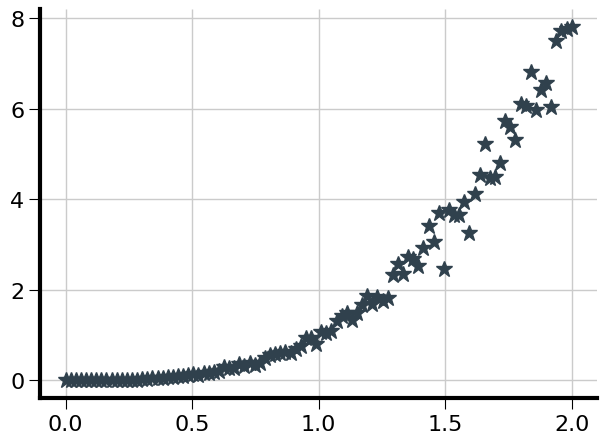

In [70]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

x = np.linspace(0, 2, 100)
y = x**3 * np.random.normal(1,0.1, 100)

plt.plot(x, y, '*');

# Neuron

<center><img src="img/nn_oneneuron.png" width=40% class="stretch"></center>

* Wir starten mit einem sehr einfachen Netz mit nur einem Neuron. 
* Als Aktivierungsfunktion verwendet das Neuron die Sigmoid Funktion. 

In [71]:
# Das ein Neuronen Netz mit Sigmoid Aktivierung
def ein_neuron(x, w, b):
    return 1 / (1 + np.exp(w*x+b))

In [72]:
# Vorhersage des Netzes
w = 1
b = 1

ein_neuron(0.2, w, b)

0.23147521650098238

# Kostenfunktion

* Für das Netz müssen die Kosten des Fehlers bestimmt werden. 
* Hierzu werden alle Inputs durch das Netz geschickt und des SE bestimmt. 
* In der Realität würde man hier etwas subtiles Vorgehen und einzelne *Mini-Batches* durch das Netz schicken. 

In [73]:
def cost(var, x, y):
    w, b = var
    return np.sum((ein_neuron(x, w, b)-y)**2)

cost([w, b], x, y)

902.3261661794638

# Optimierung des Netzes

* Ich kürze an dieser Stelle ein wenig ab und verwende einen fertigen Optimierer und erspare Ihnen und mir die detaillierte Backpropagation. 
* In unserem einfachen Fall gibt es nur zwei Variablen für die Optimierung $w$ und $b$

In [74]:
from scipy.optimize import minimize
minimize(cost, [1, 1], args=(x, y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 594.8219421698703
        x: [-1.230e+01  9.515e+00]
      nit: 15
      jac: [ 0.000e+00  7.629e-06]
 hess_inv: [[ 2.219e+01 -2.013e+01]
            [-2.013e+01  1.933e+01]]
     nfev: 54
     njev: 18

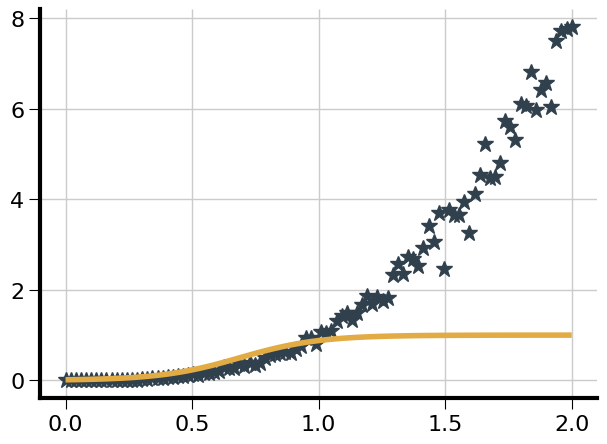

In [75]:
plt.plot(x, y, '*')
plt.plot(x, ein_neuron(x, -6.37157037, 4.38767894), '-');

# Mehr als ein Neuron

* Offensichtlich sind wir noch ein wenig von der Macht der NN entfernt. 
* Zu einem großen Teil liegt dies daran, dass unsere Aktivierungsfunktion auch nur einen Wertebereich von $[-1, 1]$ abdeckt. 
* Es soll daher ein neues, mächtigeres Netz erstellt werden. Es kombiniert zwei Sigmoid Aktivierungen und ein lineares Ausgabelayer. 



In [76]:
def drei_neuron(x, params):
    w1, b1, w2, b2, w3, w4, b3 = params
    x1 = 1 / (1 + np.exp(w1*x+b1))
    x2 = 1 / (1 + np.exp(w2*x+b2))
    
    return w3*x1+w4*x2+b3

In [77]:
def cost(params, x, y):
    return np.sum((drei_neuron(x, params)-y)**2)

res = minimize(cost, [.5]*7, args=(x, y))
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5.46192617273239
        x: [-3.070e+00  6.293e+00 -4.806e+00  5.469e+00  1.391e+01
             1.493e+00 -5.409e-02]
      nit: 113
      jac: [ 2.173e-04  1.164e-04  2.325e-06  2.086e-06 -1.389e-05
            -3.433e-05 -9.102e-05]
 hess_inv: [[ 9.316e-01  2.512e-01 ...  2.709e+00 -1.082e-01]
            [ 2.512e-01  7.388e-01 ...  1.132e+00  8.703e-02]
            ...
            [ 2.709e+00  1.132e+00 ...  8.223e+00 -2.288e-01]
            [-1.082e-01  8.703e-02 ... -2.288e-01  6.072e-02]]
     nfev: 1265
     njev: 157

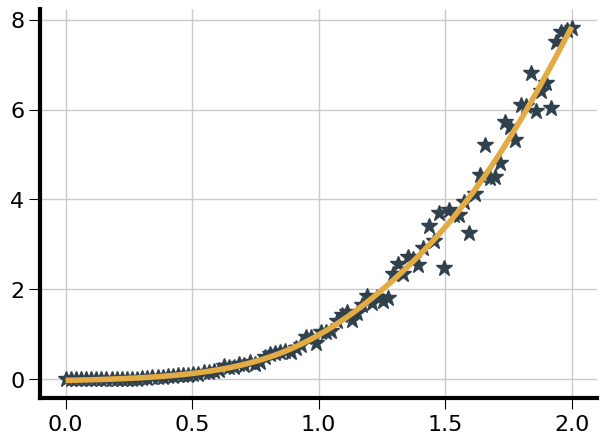

In [78]:
plt.plot(x, y, '*')
plt.plot(x, drei_neuron(x, res.x), '-');

# Mehr als ein Output

* Bisher haben wir mit recht viel Aufwand (nicht-lineare Optimierung) eine einfache Regression gebaut. 
* Jetzt ist das Ziel das Problem ein wenig zu verkomplizieren. Es müssen nun zwei Ausgaben vorgergesagt werden.

In [79]:
x = np.linspace(0, 2, 100)
y = x**3 * np.random.normal(1,0.1, 100)
y2 = -x**2 * np.random.normal(1,0.1, 100)

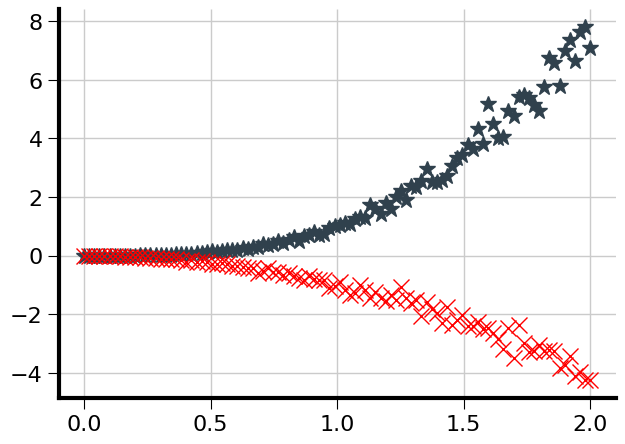

In [80]:
plt.plot(x, y, '*')
plt.plot(x, y2, 'rx');

# Neuronales Netz mit 4 Neuronen

In [81]:
def vier_neuron_zwei_outputs(x, params):
    w1, b1, w2, b2, w3, w4, b3, w5, w6, b4 = params
    x1 = 1 / (1 + np.exp(w1*x+b1))
    x2 = 1 / (1 + np.exp(w2*x+b2))
    
    return [w3*x1+w4*x2+b3,
            w5*x1+w6*x2+b4]


def cost(params, x, y):
    return np.sum((vier_neuron_zwei_outputs(x, params)[0]-y)**2)+np.sum((vier_neuron_zwei_outputs(x, params)[1]-y2)**2)

cost([1]*10, x, y)

res = minimize(cost, [.5]*10, args=(x, y))

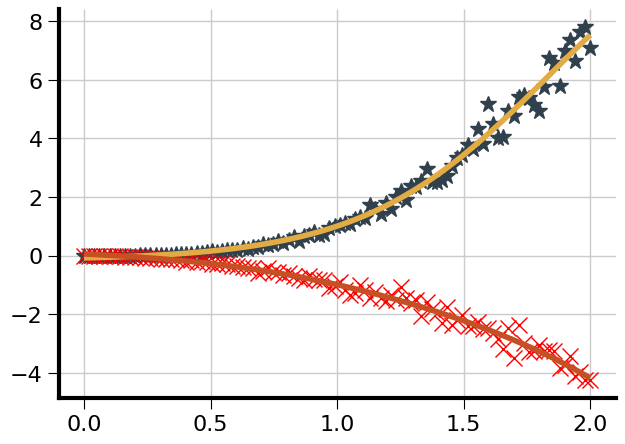

In [82]:
plt.plot(x, y, '*')
plt.plot(x, y2, 'rx')
plt.plot(x, vier_neuron_zwei_outputs(x, res.x)[0], '-')
plt.plot(x, vier_neuron_zwei_outputs(x, res.x)[1], '-');

# Fragen

* Was sind die Hyperparameter eines Neuronalen Netzes?
* Was könnten potentielle Probleme beim Training von Neuronalen Netzen sein?

# MNIST Problem

<center><img src="img/MnistExamples.png" width=30% class="stretch"></center>


* Aufgabe: Erkennen Sie passend zu einer handschriftlichen Ziffer die passende Klasse
* Wir untersuchen an diesem Beispiel
    * Verschiedene Convolutional Layer
    * Pooling Layer
    * Flache Layer
    * Dummy Encoding

*By Josef Steppan - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=64810040*



# MNIST Daten

In [83]:
#download mnist data and split into train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [84]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

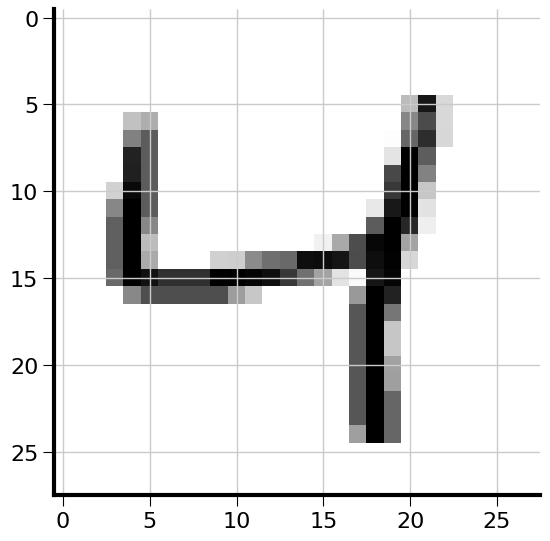

In [85]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
plt.imshow(X_train[2], cmap='gray_r');

# Umformen der Daten für die Nutzung mit NN

In [86]:
X_train.shape

(60000, 28, 28)

In [87]:
# Umformen der Features
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [88]:
#Dummy Encoding unserer Klasse
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [89]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# MNIST in Python

In [90]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = MaxPooling2D((2,2),name='maxPool1')(x)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv3',padding='same')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)

x = Flatten()(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

In [91]:
model.summary()

Model: "Predict"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_conv1 (Conv2D)            │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxPool1 (MaxPooling2D)         │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_conv2 (Conv2D)            │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxPool2 (MaxPooling2D)         │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_conv3 (Conv2D)            │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxPool3 (MaxPooling2D)         │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

# Convolutional Layer (Faltung)


<center><img src="img/conv.gif" width=30% class="stretch"></center>


* Die Neuronalen Netze sind nicht mehr ein- sondern mehr-dimensional
* Wir betrachten nicht den Inhalt als Ganzes sondern überlappende Bereiche
* Analogie zu einem Filter bzw. biologischen Sehen
    * Erkennen von verschiedenen Mustern
    * Einzelne Muster kombinieren sich zu komplexeren Mustern
    * Absolute Position von Inhalten ist selten relevant

# Beispiel Faltung

   - **Eingabematrix (Input)**:
     $$
     \begin{bmatrix}
     1 & 2 & 3 \\
     4 & 5 & 6 \\
     7 & 8 & 9 \\
     \end{bmatrix}
     $$

   - **Filter (Kernel)**:
     $$
     \begin{bmatrix}
     1 & 0 \\
     0 & -1 \\
     \end{bmatrix}
     $$



* Die Faltung wird durch das Verschieben des Filters über die Eingabematrix und das Berechnen des Skalarprodukts an jeder Position durchgeführt.

   - **Position (1,1)**:
     $$
     (1 \cdot 1) + (2 \cdot 0) + (4 \cdot 0) + (5 \cdot -1) = 1 + 0 + 0 - 5 = -4
     $$
   - **Position (1,2)**:
     $$
     (2 \cdot 1) + (3 \cdot 0) + (5 \cdot 0) + (6 \cdot -1) = 2 + 0 + 0 - 6 = -4
     $$
   - **Position (2,1)**:
     $$
     (4 \cdot 1) + (5 \cdot 0) + (7 \cdot 0) + (8 \cdot -1) = 4 + 0 + 0 - 8 = -4
     $$
   - **Position (2,2)**:
     $$
     (5 \cdot 1) + (6 \cdot 0) + (8 \cdot 0) + (9 \cdot -1) = 5 + 0 + 0 - 9 = -4
     $$



* Ergebnis der Faltung:
     $$
     \begin{bmatrix}
     -4 & -4 \\
     -4 & -4 \\
     \end{bmatrix}
     $$


# Max Pool Layer

<center><img src="img/nn_max_pool.png" width=30% class="stretch"></center>

* Das Convolutional Layer ist ein spezifisch trainierter Filter. Es erkennt z.B. ein Auge auf dem Bild.
* Diese Information ist aber immer noch ortsgebunden. 
* Ein Pooling Layer versucht diese Bindung aufzulösen indem es Bereiche z.B. über den Maxwert zusammenfasst. 
* D.h. es findet ein Down-Sampling statt; das Bild wird kleiner. 

# Beispiel Pooling

- Max Pooling reduziert die Dimensionen der Eingabematrix, indem es das Maximum aus Nicht-überlappenden Unterbereichen (meist 2x2) extrahiert.
- **Pooling-Größe**: 2x2
- **Stride**: 2 (verschiebt das Fenster um 2 Elemente pro Schritt)

- **Eingabematrix (Input)**:
     $$
     \begin{bmatrix}
     1 & 3 & 2 & 4 \\
     5 & 6 & 7 & 8 \\
     9 & 2 & 1 & 4 \\
     6 & 3 & 5 & 7 \\
     \end{bmatrix}
     $$





- **Position (1,1)**: 
     $$
     \begin{bmatrix}
     1 & 3 \\
     5 & 6 \\
     \end{bmatrix}
     $$

- **Position (1,2)**: 
     $$
     \begin{bmatrix}
     2 & 4 \\
     7 & 8 \\
     \end{bmatrix}
     $$

- **Position (2,1)**: 
     $$
     \begin{bmatrix}
     9 & 2 \\
     6 & 3 \\
     \end{bmatrix}
     $$

- **Position (2,2)**:
     $$
     \begin{bmatrix}
     1 & 4 \\
     5 & 7 \\
     \end{bmatrix}
     $$


- Ergebnis des Max Pooling:
     $$
     \begin{bmatrix}
     6 & 8 \\
     9 & 7 \\
     \end{bmatrix}
     $$

# MNIST Training / Backpropagation in Python

In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9853 - val_loss: 0.0541
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9929 - loss: 0.0243 - val_accuracy: 0.9871 - val_loss: 0.0444
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9937 - loss: 0.0181 - val_accuracy: 0.9876 - val_loss: 0.0469


# MNIST in Python

In [110]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [111]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[3.28093509e-13, 1.59756343e-14, 2.59259610e-11, 3.67431752e-10,
        1.05233943e-19, 5.97510339e-15, 2.46297824e-22, 1.00000000e+00,
        1.12973345e-13, 2.66829375e-12],
       [1.48451396e-09, 4.26678914e-10, 1.00000000e+00, 1.23643839e-14,
        7.09759675e-20, 1.83986445e-22, 2.84164792e-11, 5.51393013e-18,
        2.43739355e-13, 1.38311862e-15],
       [4.63842936e-10, 9.99999046e-01, 4.22465352e-09, 2.23099567e-10,
        7.30930708e-07, 5.64947568e-11, 1.41086060e-10, 9.64099485e-08,
        1.22821731e-07, 6.49767795e-09]], dtype=float32)

In [95]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# MNIST in Python

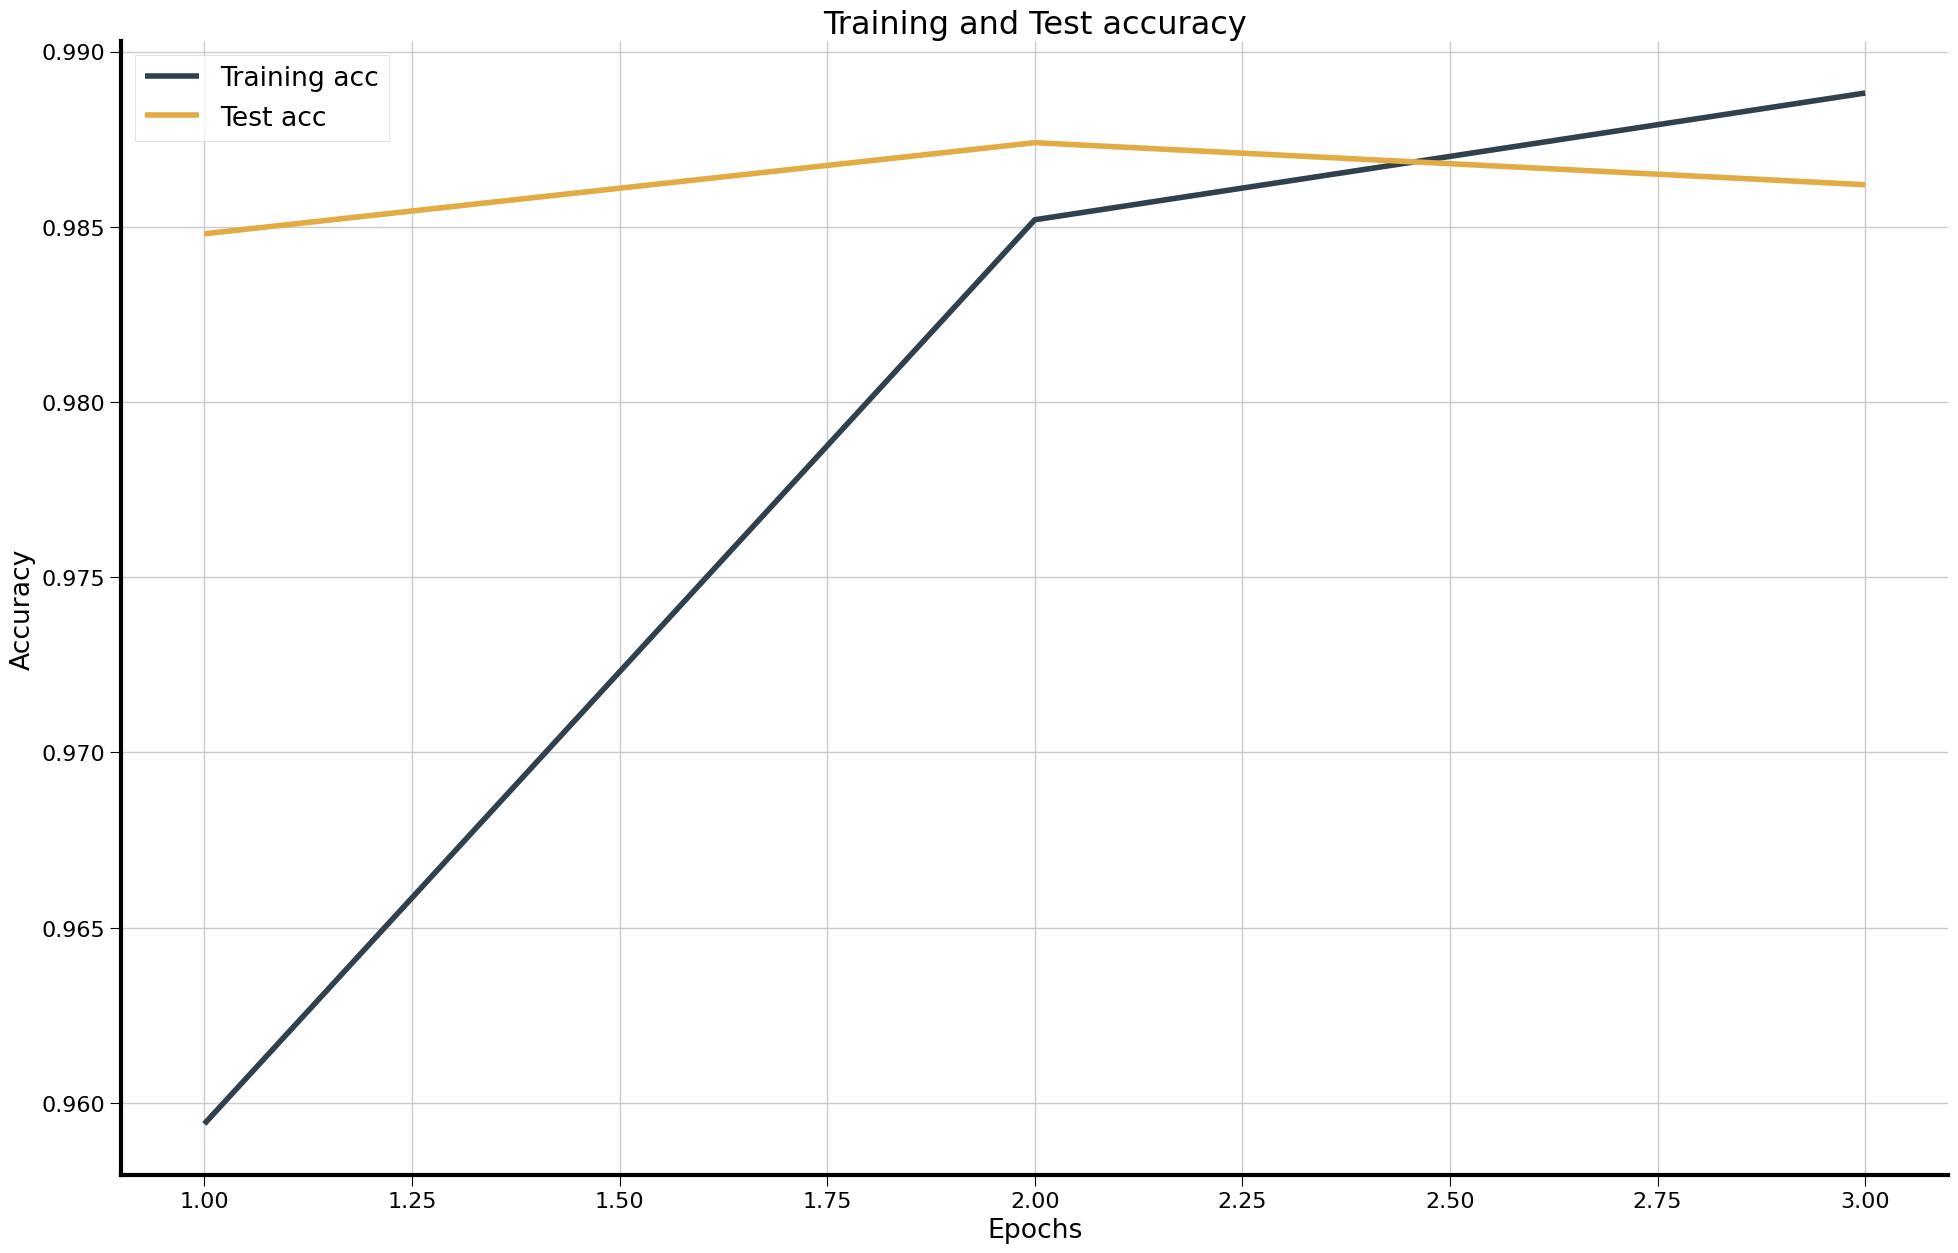

In [96]:
fig, ax = plt.subplots(1, 1, figsize=plot_size)
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Test acc')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers][1:]
#layer_outputs = [layer.output for layer in model.layers if layer.name == layer_name or layer_name is None][1:]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[2].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray_r')
            activation_index += 1   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


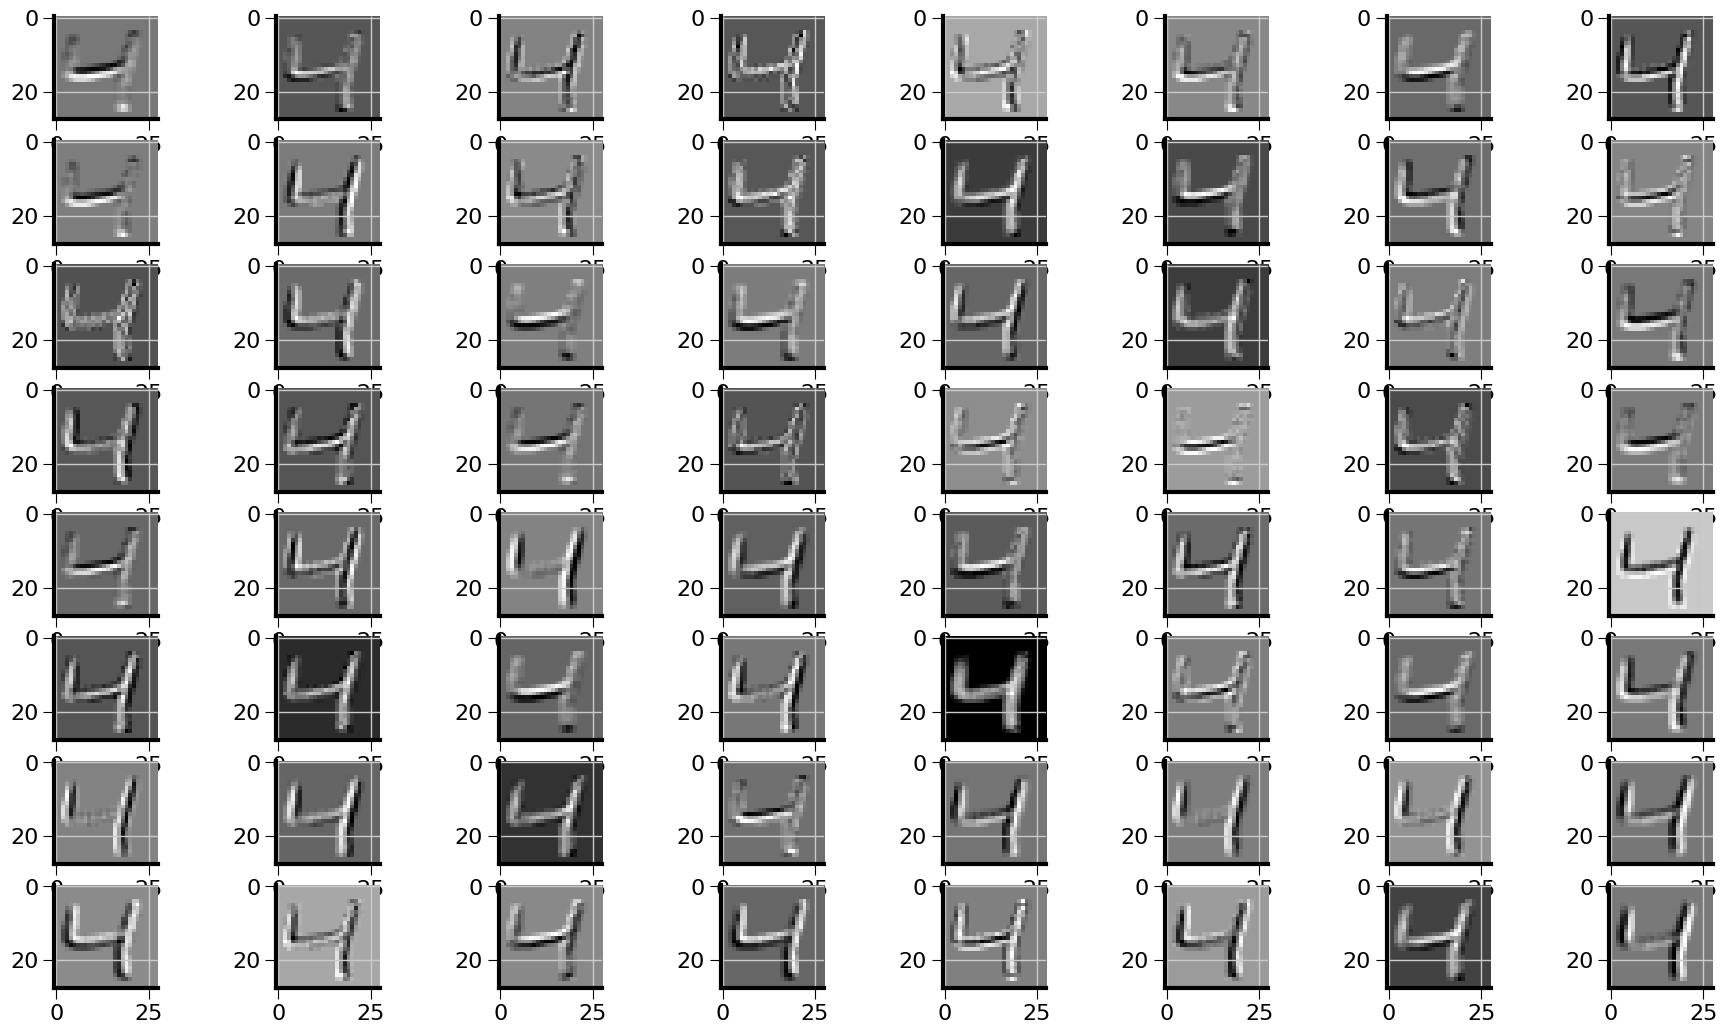

In [98]:
display_activation(activations, 8, 8, 0)

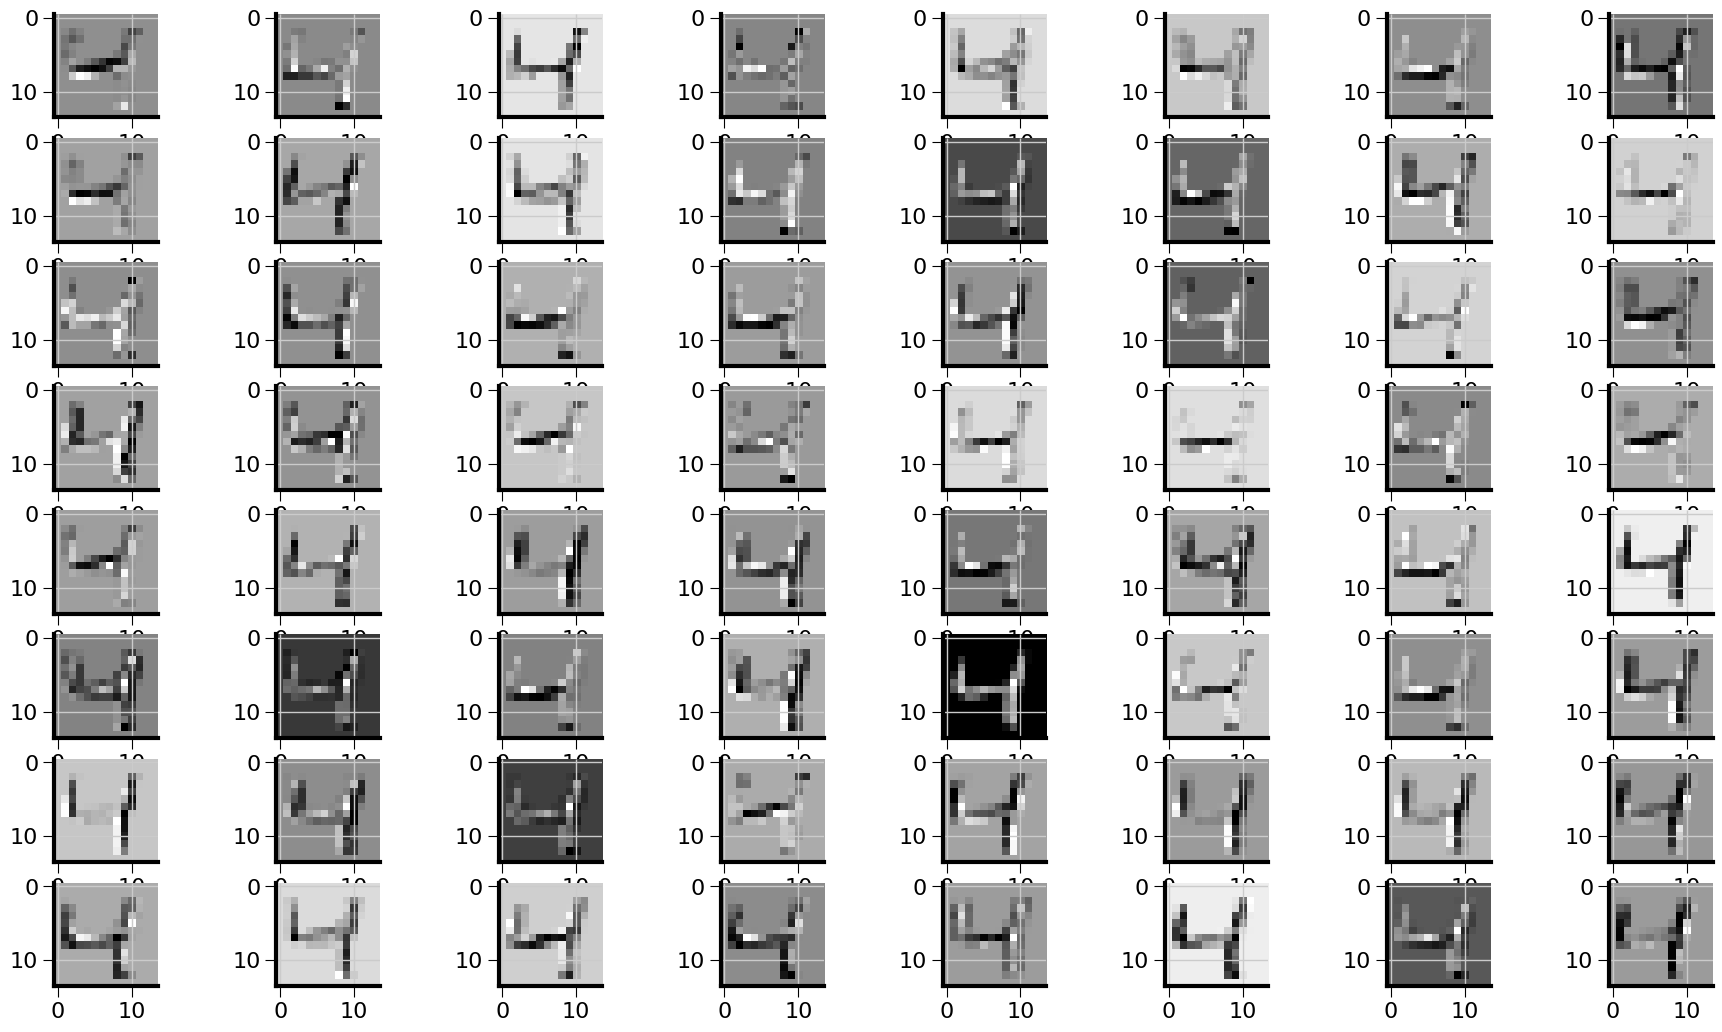

In [99]:
display_activation(activations, 8, 8, 1)

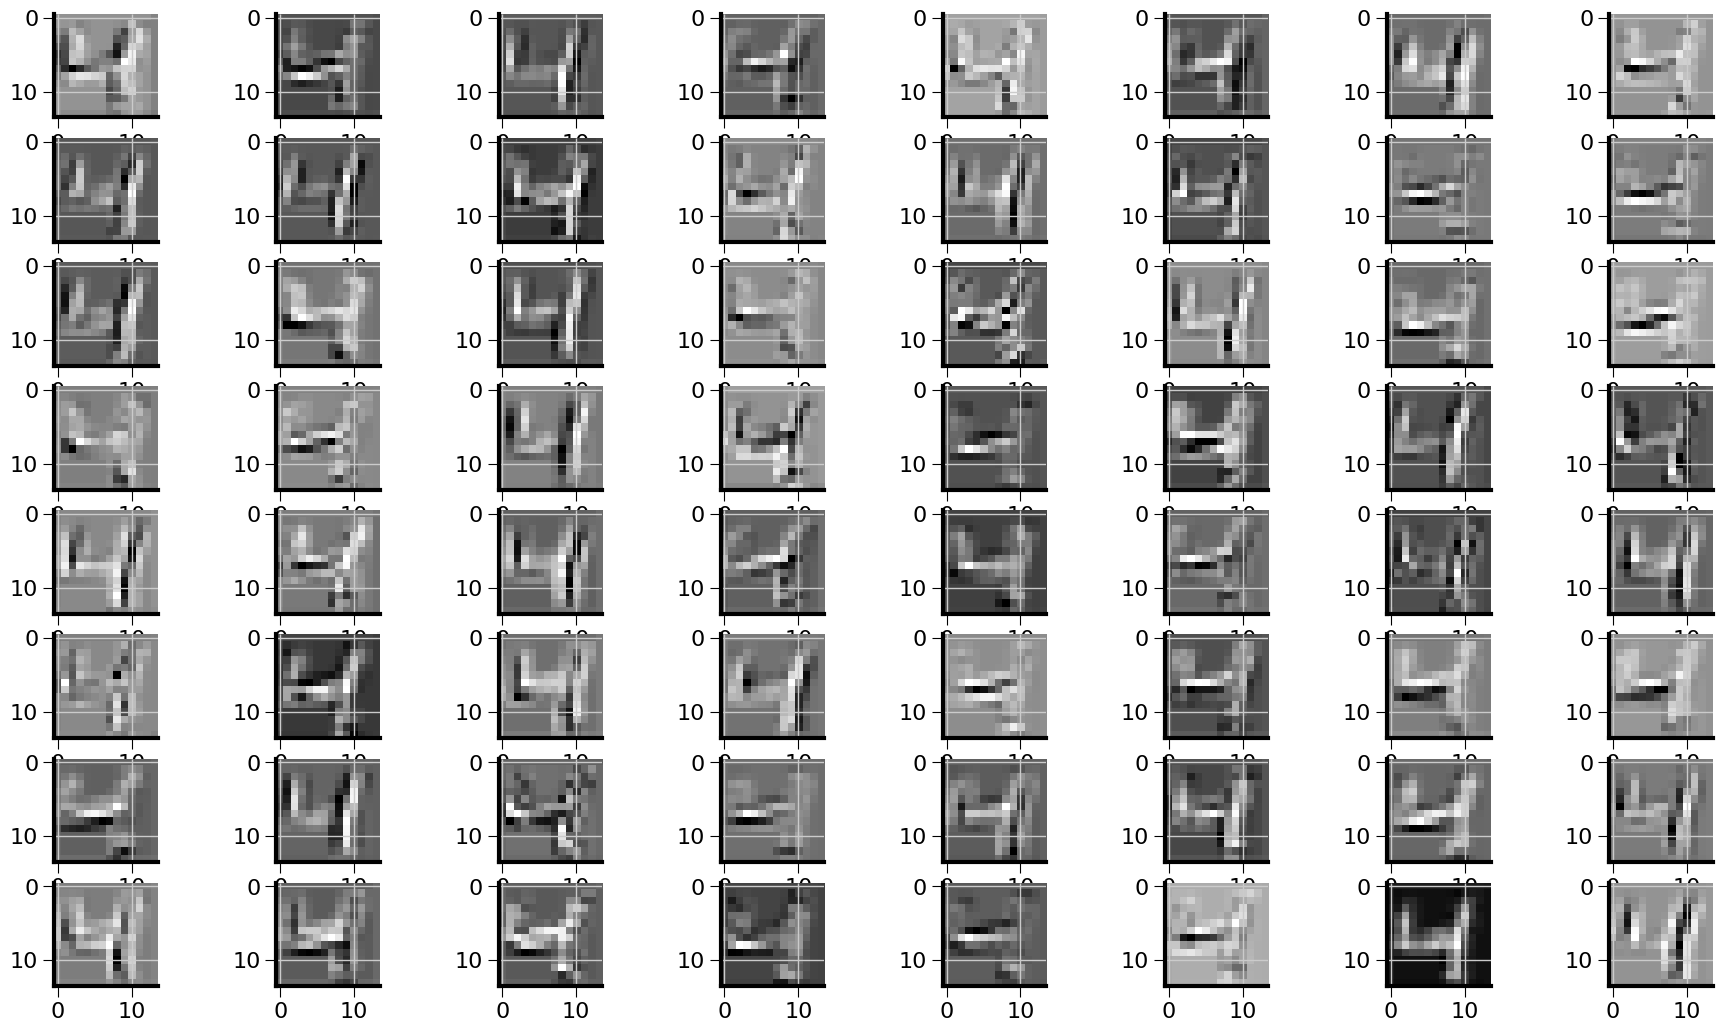

In [100]:
display_activation(activations, 8, 8, 2)

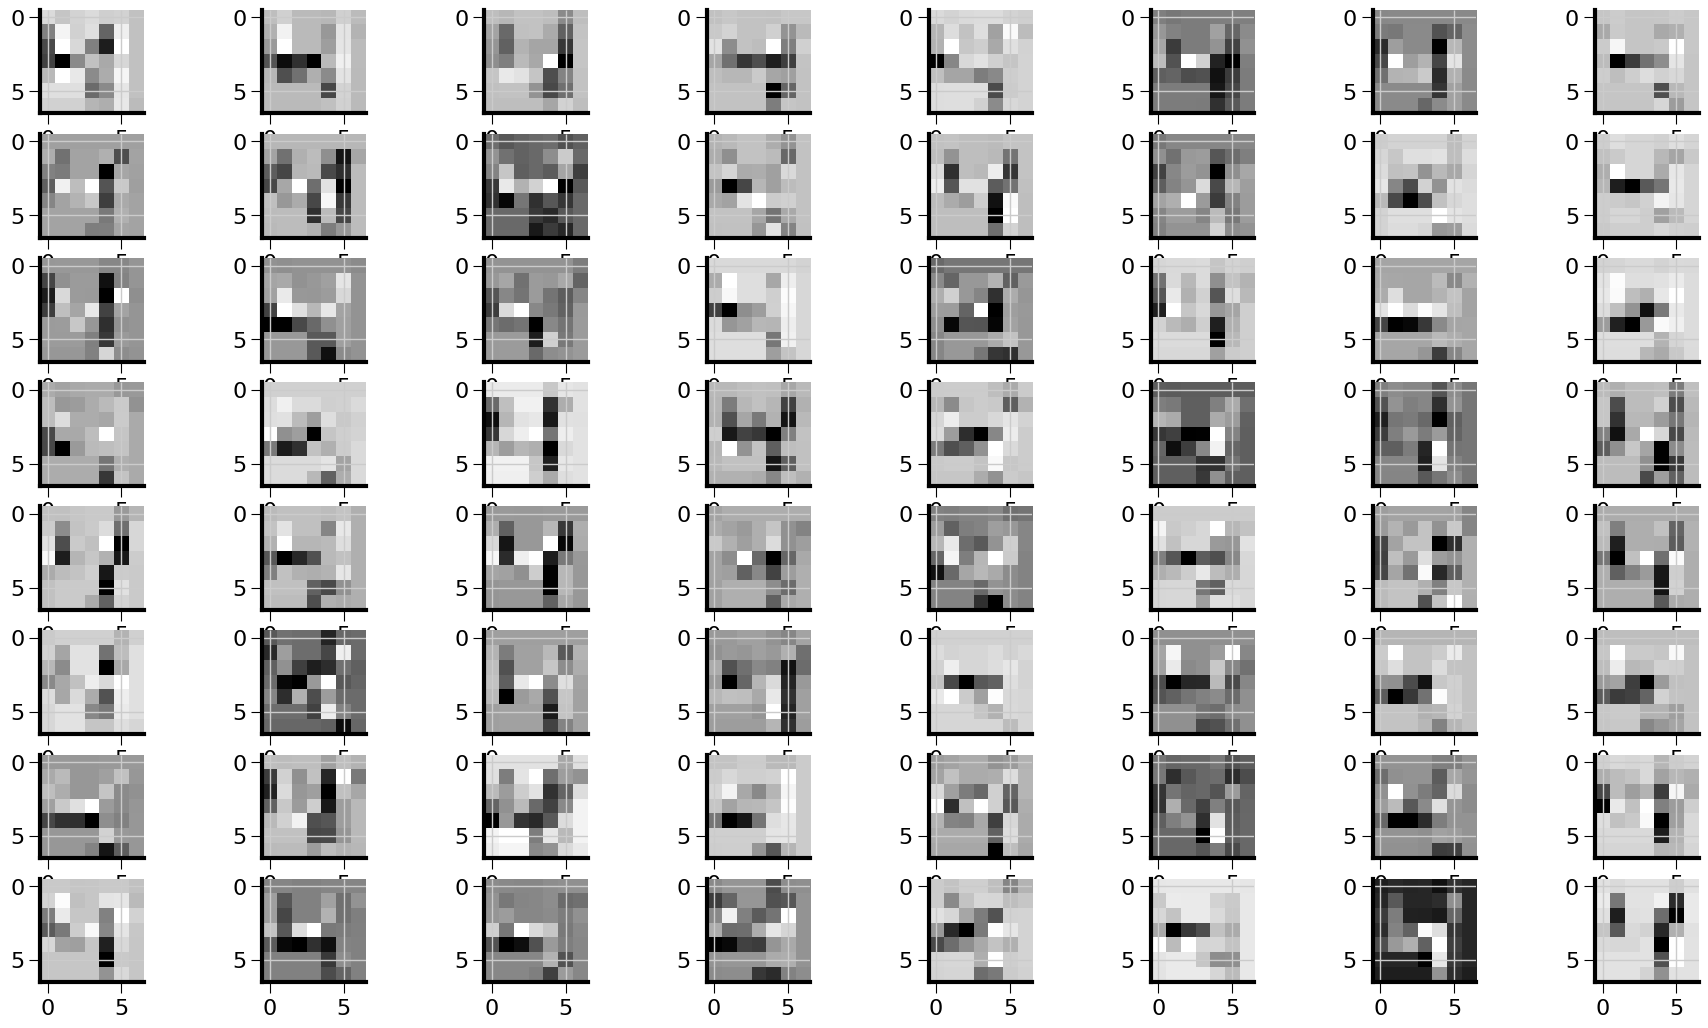

In [101]:
display_activation(activations, 8, 8, 3)

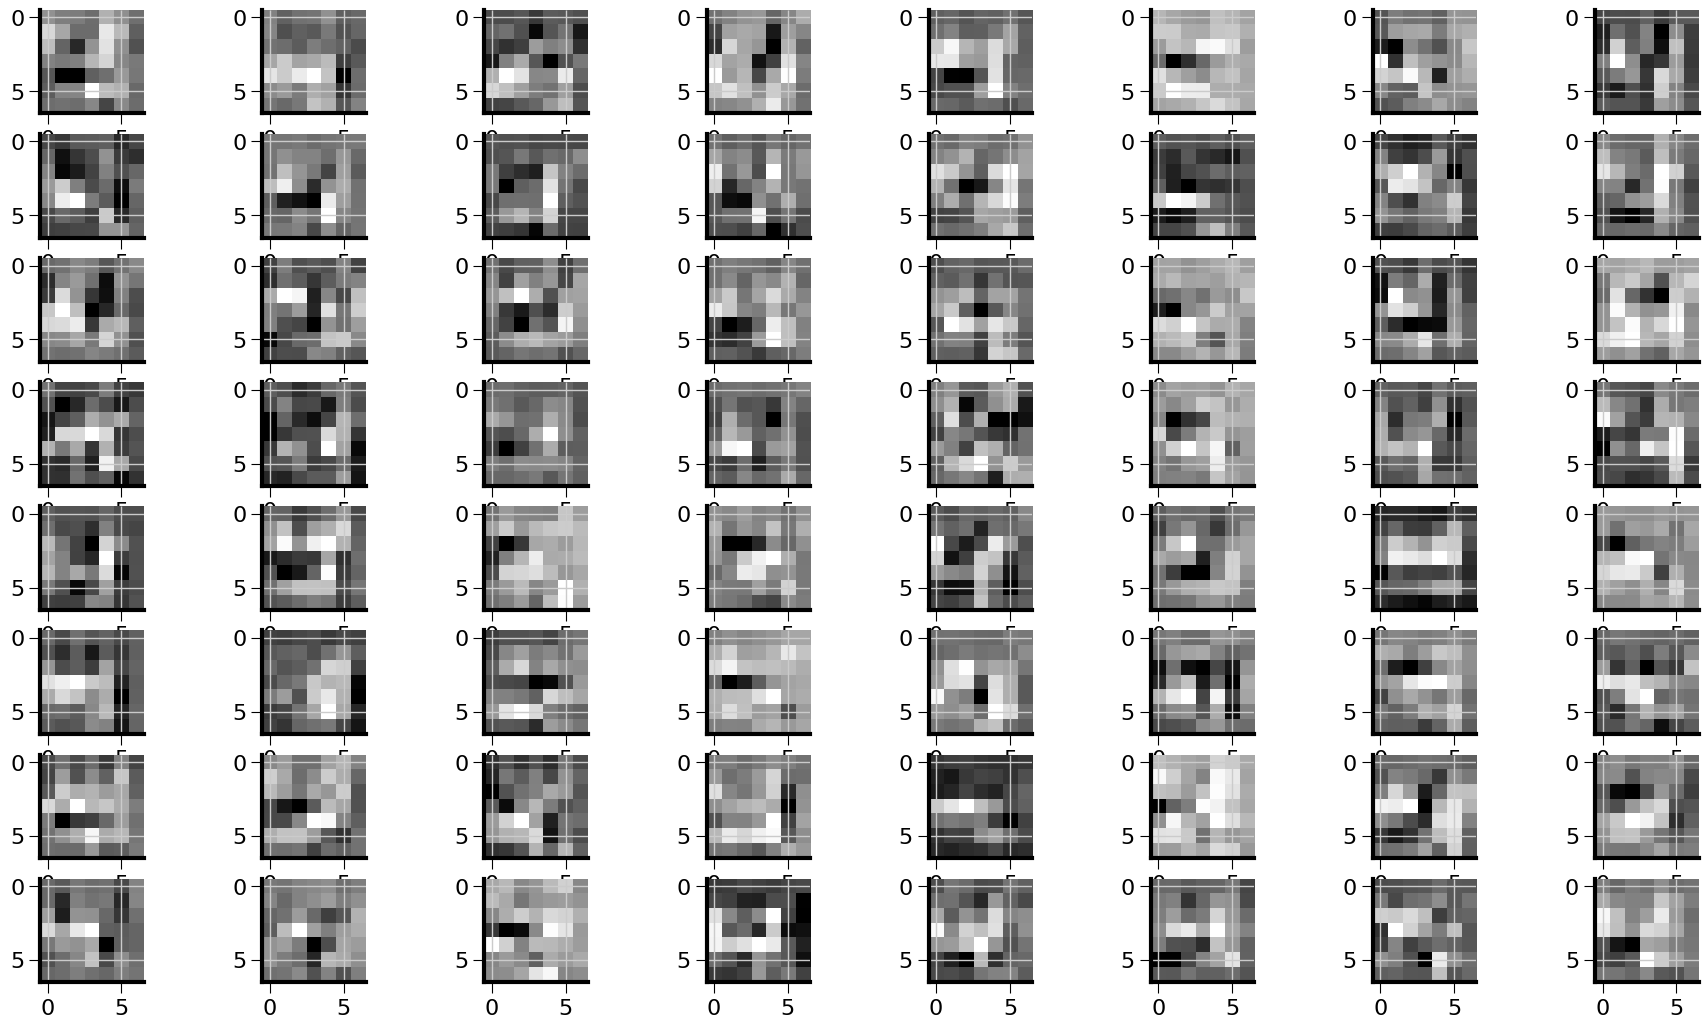

In [102]:
display_activation(activations, 8, 8, 4)

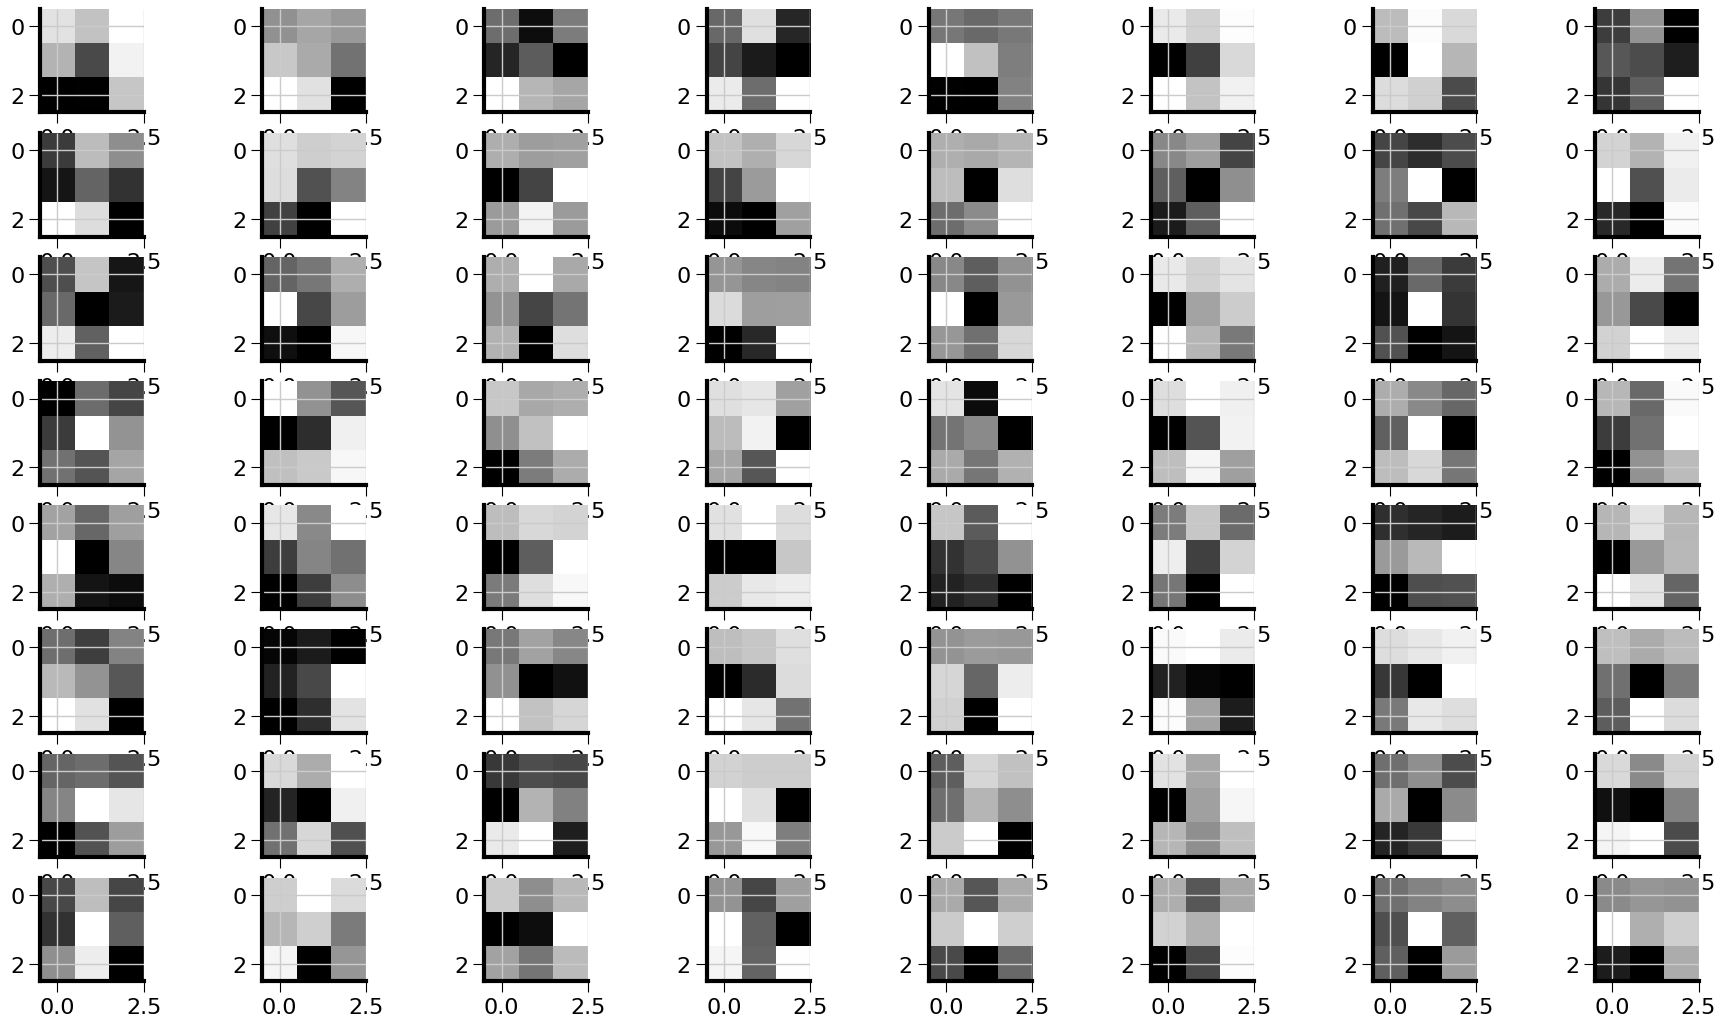

In [103]:
display_activation(activations, 8, 8, 5)

# Convolutional NN

* State of the Art für die Klassifikation von Bildern etc. 
* Image Net Competition
* This Person does not exist / StyleGAN

# Zusammenfassung

* Was ist ein Neuron?
* Grundlegende Aktivierungsfunktionen
* Convolutional Neural Networks